In [1]:
from image_loader import ImageLoader
from tree_reviewer import TreeReviewer
from models.mask_extractor_sam import MaskExtractorSAM
from models.monocular_depth_dam import MonocularDepthDAM
from models.gdino_object_detector import GDinoObjectDetector
from config import get_env

In [2]:
import os
import numpy as np 

#get a random image from a folder path
def get_random_image(folder_path):
    files = os.listdir(folder_path)
    file = files[np.random.randint(len(files))]
    print(file)
    return file

### Step 1: Define The Chosen Strategies 
The models take some time to load is best to load them before the rest of the application

In [3]:
# Define the models
mask_extractor = MaskExtractorSAM()
depth_mapper = MonocularDepthDAM()
object_classifier = GDinoObjectDetector()

In [4]:
from strategies.tree.first_tree_segmenter import FirstTreeSegmenter
from strategies.card.card_segmentation_strategy import CardSegmentationStrategy

tree_segmentation_strategy = FirstTreeSegmenter(mask_extractor, 
                                                    depth_mapper, 
                                                    object_classifier)
card_segmentation_strategy = CardSegmentationStrategy(mask_extractor, 
                                                    object_classifier)

### Step 2: Define The Tree Reviewer and Evaluate an Image

In [5]:
folder_path = get_env('TEST_TREE_IMAGES_PATH')
image_loader = ImageLoader(folder_path, 50, 0)
tree_reviewer = TreeReviewer(tree_segmentation_strategy, card_segmentation_strategy)

Number of images: 50


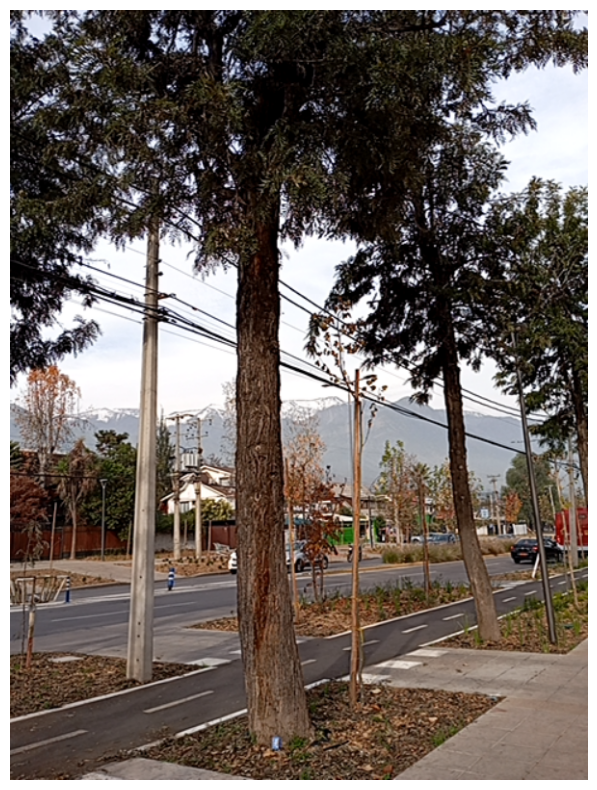

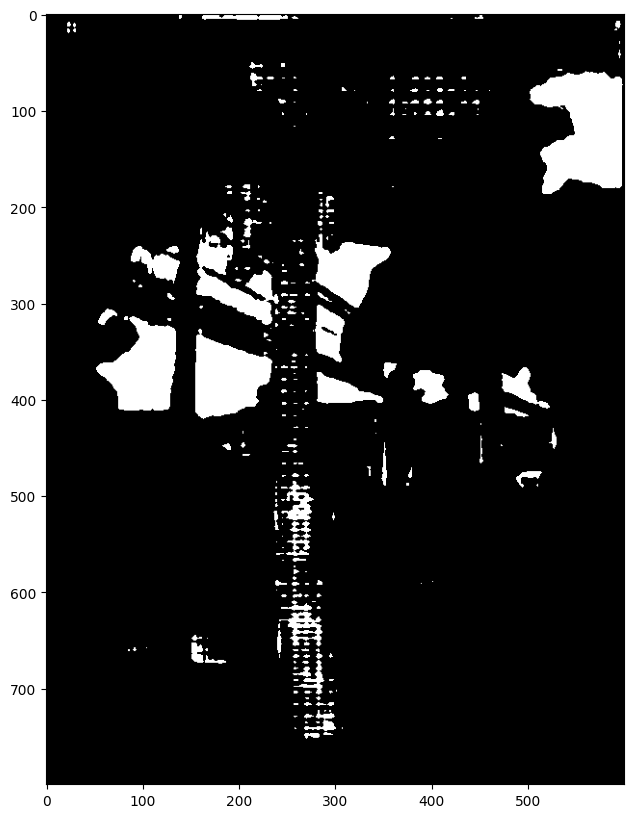

c:\Users\jflir\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jflir\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


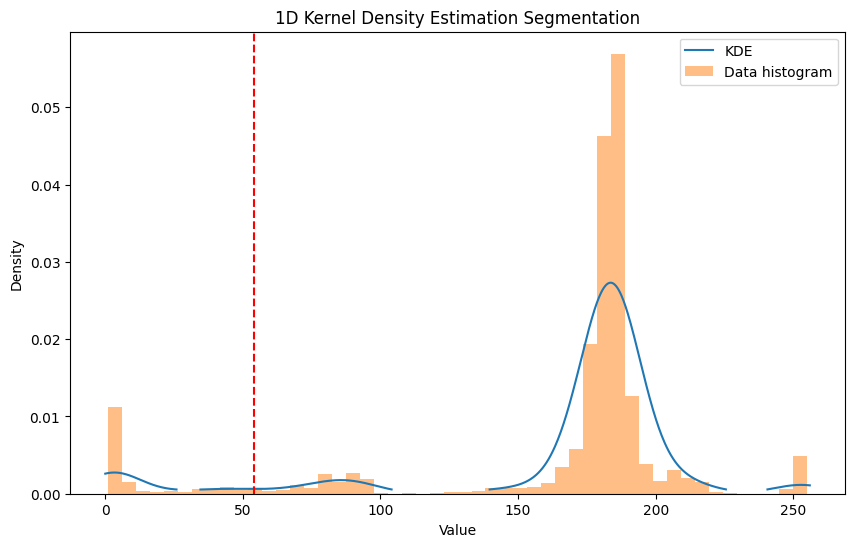

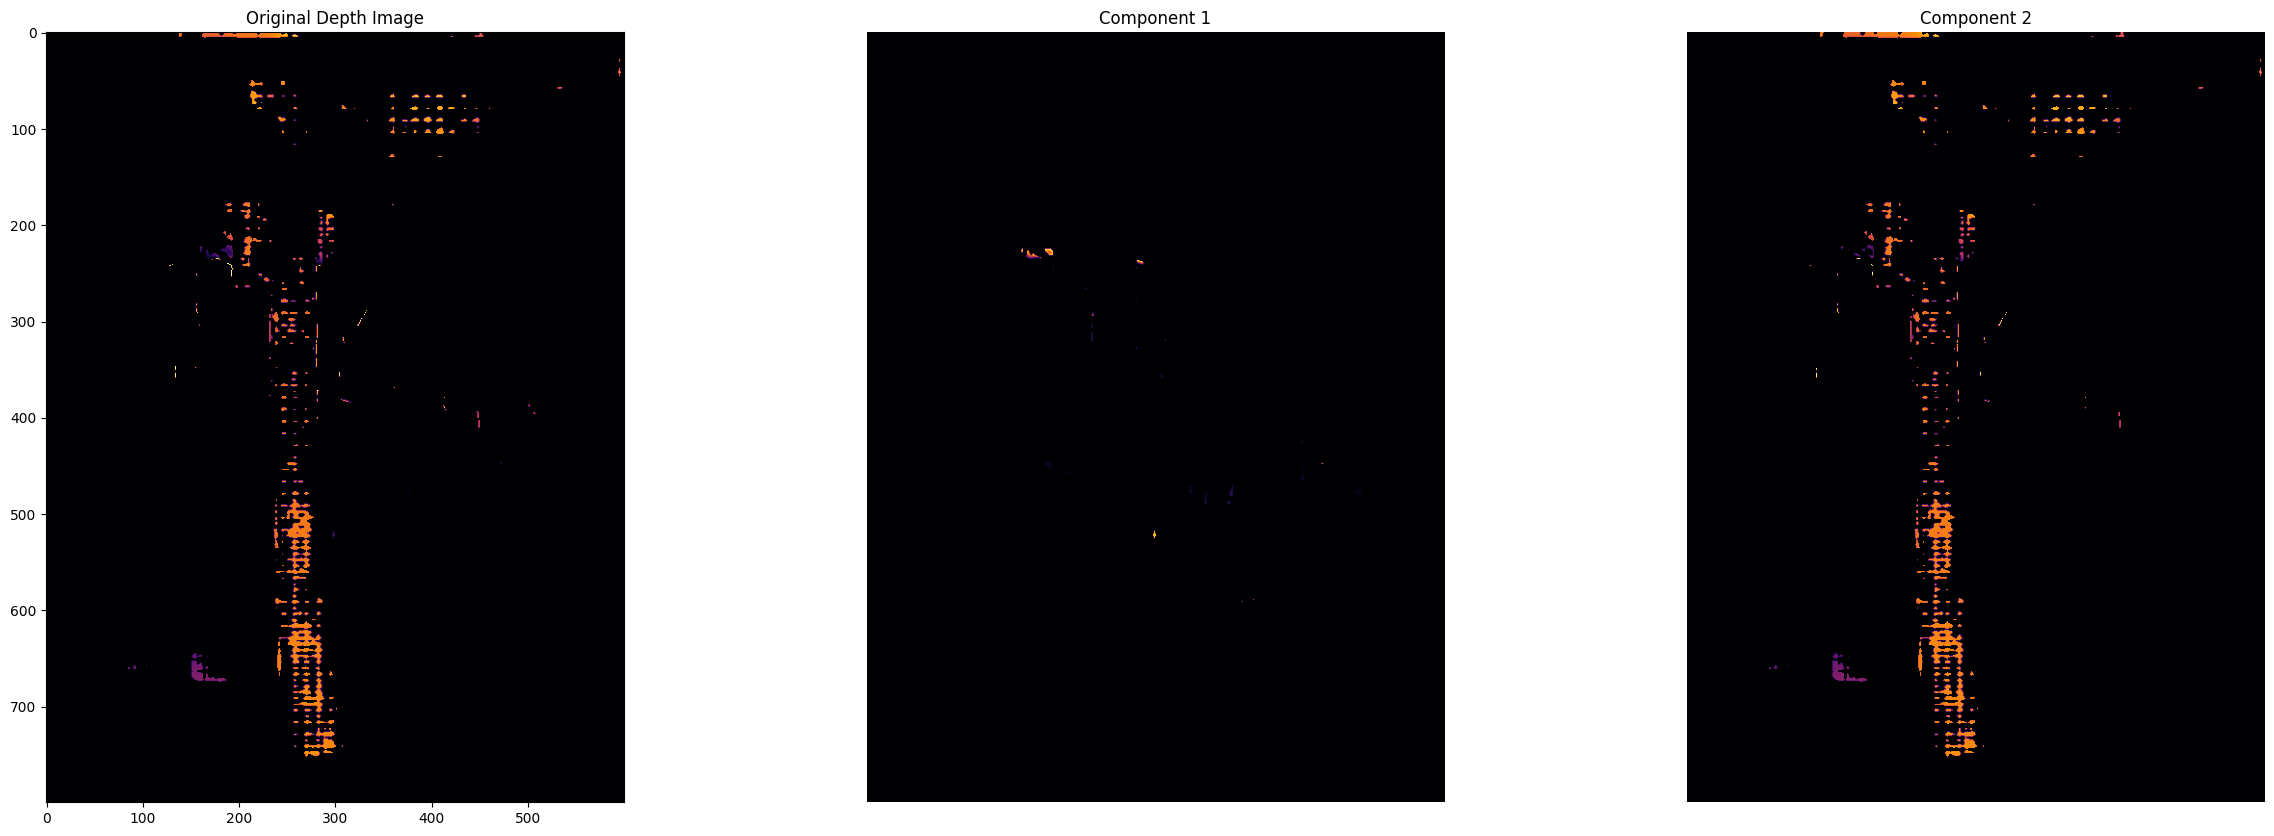

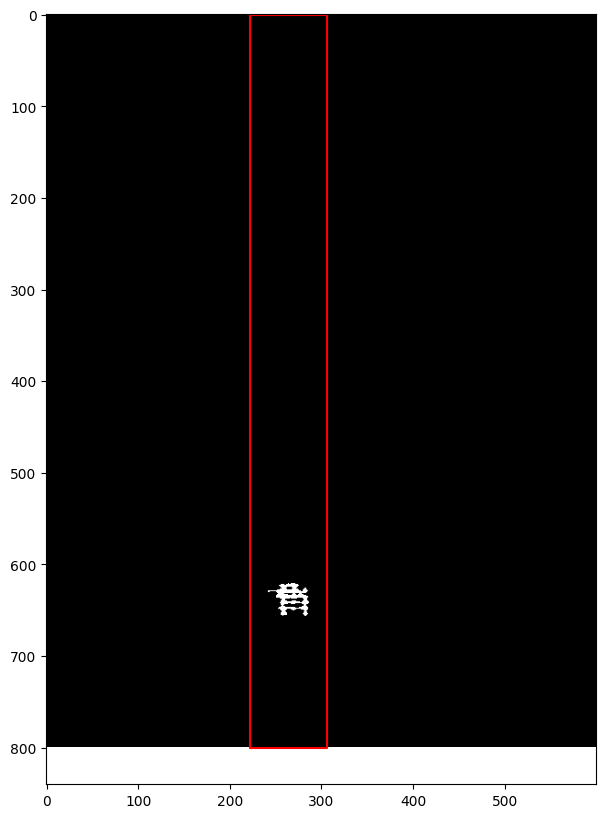

IndexError: index 0 is out of bounds for axis 1 with size 0

In [6]:
count = 0

# image = next(image_loader.load_image(image_file='111187-0.jpg'))
# image = next(image_loader.load_image(image_file='133284-0.jpg'))
# image = next(image_loader.load_image(image_file='27012-0.jpg'))
# image = next(image_loader.load_image(image_file='22888-0.jpg'))
# image = next(image_loader.load_image(image_file='14422-0.jpg'))
# image = next(image_loader.load_image(image_file='141591-0.jpg'))
image = next(image_loader.load_image(image_file='10188.jpeg'))
# image = next(image_loader.load_image(image_file='111187-0.jpg'))
# image = next(image_loader.load_image(image_file='102252-0.jpg')) #failed
# image = next(image_loader.load_image(image_file='86251-0.jpg')) failed
# image = next(image_loader.load_image(image_file=get_random_image(folder_path)))
tree_image = tree_reviewer.review_tree(image, plot=True)
print(tree_image.error_tags)

In [ ]:
tree_image.__dict__

{'tree_image': <models.tree_image.TreeImage at 0x2f1075d8310>,
 'error_tags': ['No card detected'],
 'precision': 2,
 'mm_per_pixel': None,
 'tree_height': 0.0,
 'principal_branches_h': 0.0,
 'dap': 0.0,
 'file': '9976.jpeg',
 'shape': (800, 600, 3),
 'classification_score': 0.48,
 'hypothesis_score': 0.93,
 'trunk_xyxy': [0.79, 0.58, 0.84, 0.96],
 'mask_xyxy': [0.3, 0.0, 0.86, 0.96],
 'tree_image_data': {'shape': (800, 600, 3),
  'classification_score': 0.48,
  'hypothesis_score': 0.93,
  'trunk_xyxy': [0.79, 0.58, 0.84, 0.96],
  'mask_xyxy': [0.3, 0.0, 0.86, 0.96]},
 'metrics': {'DAP': 0.0, 'height': 0.0, 'principal_branches_height': 0.0}}

In [ ]:
import lzstring
import json
import PIL.Image as Image
import matplotlib.pyplot as plt

# Example base64 encoded compressed data
compressed_base64_string = "N4IgNglgdgpgziAXAbVABwPbQC4JaADyQCYAWANgDoBmATgFYAGBgDmPoEYHqAaEATyTl2lMh0YtJ5AOwcW0+gF8ehEhRoNm9Np259BiYfVGlxkljLkLlqxMWItKHDtRalt7LvV4ChXSiyMjMTUXNTU9LSuNiBEdnJO5LTkpNLEHDLJkvp+0pSkjEYxccQSlGnSMuR0GYwc9OQ5hvWU5OSc5M7UDhzsxUhcxJT0I4EutLX1jb7NpMPS0sHVlvJKKrEDLBw0jNp1NeR1DU2dxpI9fetxGY70pBPB0izdjKHEJ/4cqeFSsqv9iCmTloploFgkdDcpBOZCc9AcUUKKUKxABX0c7BYtGI1QmhymMNoAWcBRcK2sVwGpGolFe9Gk1EOzzB1JYJwionhoSiESiFNsX0YtPs3UZEJZ0JmyNppM6LguawFrkoE2koOpvOoChOpDmnUY32qCrRys6hwZTMhupOTFpnHCuzaBWEJqJwl2uo1kS19BteSkGRB4W9LDR1OGWpB4OZUJOMgCtAZrgsf35G0BnAC2qlgXKWoZYU1ocpgOErXsC3sGWkWTZUpBolCdUCTpRaIUtKevV9M0WVGWga9UWLApYxmCIRClolTVkVFIxCyaeuUTtgU9wb5PYMaSGXOpy4GtCJpAsnXXXGx717ONpjvqIQPivTpWM6Vf40mxxvjjoDET1a1gC6RCt49KlDoXg+Dui6iIsEiOsiLolukVA4s4SRDj6s6wbsZC0ME1BPsBITAlwiyQXoN55PCBHwgyxEod0jbpKkqE1uQ2Q3nMp7pAsDE+sBBTDEkXDRlakowUKRGyIUPIhkJeTMGwEGeFRO5fCqKLPiUtqyAuIJYdmO5lJE9zMG0HGSMB3j5DiREeLo3izkE5T4qEzzeoedgjDQRFsGKMbWvWQynseBGPoJKH0jQT4nGwohyphm7RNFGKpJW7HJLQJxpK0Y7UI8RFRbY7B5GQ4QZO0rwEdMBhtKFDSnoWCnReO4T3IVoJXjqRJyIwTydN0WyXKV8IqmI/XdfYOpCmVI06SQmbnoVn74t+9WhCq8gFvJw42dsK37HiRx1UIpGFM1e0lS+toTJwlQHKdHzjr0OItkhqIoaerQGhMQaasZQhlAaNYWsN3ZCY4hz3FwRnbsDjig4mjIQ30AC6fAAEYAE4AK5wAAFgAwhgYAYDjSAgDjADmWMAIYABT1L6vQ8IcACUIDY/jRMAEr0wAJhABNIKQiiYyAADuECC9ghNIA0eTZoTMAQDThPYEgCjSIoQA"
image_path = "Path to the string image"

# Load the image
image = Image.open(image_path)

# Add padding if necessary to the compressed base64 string
padding = '=' * (-len(compressed_base64_string) % 4)
compressed_base64_string += padding

# Create an instance of LZString
lz = lzstring.LZString()

# Decompress the string using LZString
decompressed_string = lz.decompressFromBase64(compressed_base64_string)

# string to json
decompressed_string = json.loads(decompressed_string)

decompressed_string 


{'lines': [{'points': [{'x': 246.3950958251953, 'y': 625.2410888671875},
    {'x': 246.3950958251953, 'y': 625.2410888671875},
    {'x': 228.1138458251953, 'y': 619.8002319335938},
    {'x': 218.16964721679688, 'y': 617.40625},
    {'x': 208.72767639160156, 'y': 615.6651611328125},
    {'x': 192.55580139160156, 'y': 614.5770263671875},
    {'x': 181.30580139160156, 'y': 615.8828125},
    {'x': 168.54910278320312, 'y': 619.1473388671875},
    {'x': 156.19419860839844, 'y': 624.1528930664062},
    {'x': 148.25892639160156, 'y': 629.8114013671875},
    {'x': 143.03573608398438, 'y': 635.2523193359375},
    {'x': 140.02232360839844, 'y': 640.0401611328125},
    {'x': 138.91741943359375, 'y': 644.6104736328125},
    {'x': 138.61607360839844, 'y': 650.0513305664062},
    {'x': 139.62054443359375, 'y': 657.8861694335938},
    {'x': 143.53794860839844, 'y': 667.8973388671875},
    {'x': 151.875, 'y': 680.7377319335938},
    {'x': 162.62277221679688, 'y': 694.2310180664062},
    {'x': 175.07812

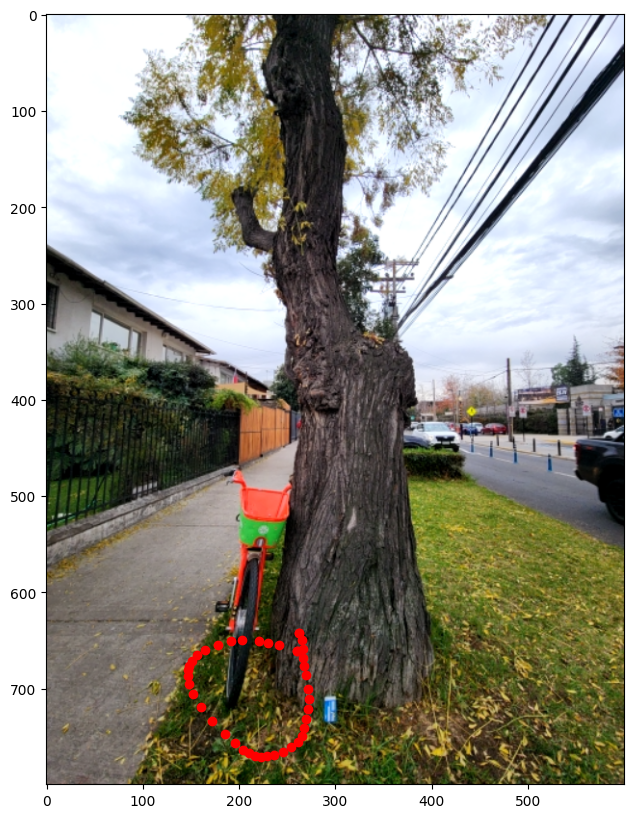

In [ ]:
points = decompressed_string['lines'][0]['points']
width = decompressed_string['width']
height = decompressed_string['height']
image_width, image_height = image.size
for point in points:
    point['x'] = (point['x'] / width)*image_width
    point['y'] = (point['y'] / height)*image_height

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.plot([point['x'] for point in points], [point['y'] for point in points], 'ro')
plt.show()